# I. Inicio: carga y contexto

## I.A. Carga del dataset

In [ ]:
import pandas as pd
df = pd.read_csv('/content/marketing_campaign_data_socail_media.csv')

In [ ]:
import pandas as pd

# Use the 'on_bad_lines' parameter to handle problematic lines
df = pd.read_csv('/content/PIB.csv', encoding='utf-8', delimiter=',', on_bad_lines='warn')
# on_bad_lines='warn' will print a warning about the problematic lines but continue execution.
# Alternatively, use on_bad_lines='skip' to skip those lines altogether.

print(df.head())
print(df.info())

                                                                                         PAIS;1983;1990;2000;2010;2022;2023;IDH; POBLACION 
Irlanda;5915         241772;14031 30257;26334 56721;48663 60044; 103.983 ;103684 8808;0                                      95; 5.262.382 
Suiza;17859          23237;39574  53981;38865 02194;76531 37294; 93.260 ;99994   93802;0                                    967; 8.849.852 
Noruega;14927        51748;28242  9814;38178  23688;88163 20859; 108.798 ;87961  78061;0                                    966; 5.519.594 
Singapur;6633        236674;11861 75616;23852 83895;47236 68308; 88.429 ;84734   25592;0                                    949; 5.917.648 
Estados Unidos;15543 89372;23888  60001;36329 97026;48650 66432; 77.247 ;81695   18707;0                                  927; 334.914.895 
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 141 entries, ('Irlanda;5915', '241772;14031', '30257;26334', '56721;48663', '60044; 103.983 ;103684', '8808;0'

<ipython-input-6-a9bd004b0e77>:4: ParserWarning: Skipping line 29: expected 7 fields, saw 8
Skipping line 91: expected 7 fields, saw 8
Skipping line 101: expected 7 fields, saw 8

  df = pd.read_csv('/content/PIB.csv', encoding='utf-8', delimiter=',', on_bad_lines='warn')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## I.B. Diccionario de variables

**Campaign_Type:** Variable cualitativa nominal. Es el tipo de campaña, si fue por youtube, instagram, etc.

**Duration:** Variable cuantitativa discreta. Refiere a la duración de la misma.

**Budget:** Variable cuantitativa continua. Presupuesto.

**Audience_Size:**Variable cuantitativa discreta. Audiencia alcanzada.

**Audience_Age_Group:** Variable cualitativa ordinal.

**Engagement_Rate**: Variable cuantitativa continua. La tasa de participación es una métrica que se utiliza para evaluar la cantidad promedio de interacciones que recibe su contenido de redes sociales por seguidor. La tasa de participación se calcula como la cantidad total de interacciones que recibe su contenido dividida por su cantidad total de seguidores, multiplicada por 100%. Cuanto más cerca a 1 sea, mayor es el nivel de compromiso e interes de los usuarios con el contenido que se publica.

**Conversion_Rate:** Variable cuantitativa continua. La tasa de conversión es el indicador más usado en las estrategias de marketing digital. Mide el impacto que ha tenido un esfuerzo para que una persona realice una acción, ya sea llenar un formulario, hacer clic en el enlace de una landing page, aprovechar un cupón o realizar una compra, entre otras metas. En otras palabras, la tasa de conversión demuestra la relación que hay entre el número de usuarios que visitaron tu sitio web y el número de usuarios que realizaron una acción objetivo específica. Se calcula con el cociente del número de objetivos obtenidos entre el número total de visitas (u otra acción); multiplicado por 100.

## I.C. Contexto del tópico elegido.
Las redes sociales y los medios digitales son cada vez más importantes para posicionar marcas y las empresas cada vez buscan mejores estrategias para posicionarse en el mercado y atraer nuevos clientes.

Nos propusimos como línea de investigación a partir del dataset, tratar de comprender cuáles son las condiciones que explican el exito o eficiencia de las campañas. Una campaña eficiente y exitosa seria aquella que con bajo presupuesto asignado alcanza tasas altas de engagement y conversion rate.


EL objetivo es entender las relaciones entre variables que nos permitan identificar posibiles estrategias de marketing a futuro, a traves de conocer a la audiencia, teniendo en cuenta sus intereses y comportamiento.En este sentido, queremos detectar que factores deben darse para alcanzar los mejores ratios de conversion y engagement, de manera tal de obtener un modelo que nos permita predecir resultados de campañas en el futuro y mejorar sus resultados.

## II. Exploración, limpieza inicial, transformaciones básicas y visualización del dataset





## II.A. Exploración inicial


De la información del data set, observamos que todos los datos estan en formato numerico, salvo la edad de la audiencia y el tipo de campaña, que tendremos que cambiarla a variable categórica y posteriormente a numérica para modelar.


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Campaign_Type       10000 non-null  object 
 1   Duration            10000 non-null  int64  
 2   Budget              10000 non-null  float64
 3   Audience_Size       10000 non-null  int64  
 4   Audience_Age_Group  10000 non-null  object 
 5   Engagement_Rate     10000 non-null  float64
 6   Conversion_Rate     10000 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 547.0+ KB
None


No se observan valores nulos , lo que simplificará la limpieza de datos

In [ ]:
print(df.isnull().sum())

Campaign_Type         0
Duration              0
Budget                0
Audience_Size         0
Audience_Age_Group    0
Engagement_Rate       0
Conversion_Rate       0
dtype: int64


In [ ]:
print(df.dtypes)


Campaign_Type          object
Duration                int64
Budget                float64
Audience_Size           int64
Audience_Age_Group     object
Engagement_Rate       float64
Conversion_Rate       float64
dtype: object


Observamos que las dos variables tipo object vamos a tener que transformarlas en principio en variables categóricas y, luego, a variables numericas. Este último paso es necesario para avanzar en el modelo de machine learning, dado que la mayoría de los algoritmos de aprendizaje automatico trabajan con variables numéricas.

In [ ]:
df.head()

Campaign_Type  Duration     Budget  Audience_Size Audience_Age_Group  \
0     Instagram        45  95.802761          75579              35-44   
1       YouTube        26  84.123524          88376              18-24   
2     Instagram        50  91.688038          99427              25-34   
3       YouTube        41  61.214077          40325              25-34   
4       YouTube        40  74.356604          10775              18-24   

   Engagement_Rate  Conversion_Rate  
0         7.775563         1.890406  
1         1.971576         4.269139  
2         5.504620         0.702806  
3         7.387365         2.035973  
4         4.336349         4.858624

Transformamos Audience Age Group a variable categorica. Para eso verificamos primero cuantos valores unicos adopta la columna y se ven 5 categorías.
Resulta relevante pasar la variable object a categorica para optimizar la estructuración de datos, reducir memoria de uso, estandarizar y luego convertir en variable numérica para modelado.

Si bien los datos se distribuyen casi por igual en audiencias de los distintos grupos etareos, mayor cantidad de datos relevados por el data set se concentra en el grupo etario de 45-54 años, que cuenta con 2100 datos de la muestra de 10.000.


In [ ]:
df['Audience_Age_Group'].unique()

array(['35-44', '18-24', '25-34', '45-54', '55-64'], dtype=object)

In [ ]:
df['Audience_Age_Group'].value_counts()

Audience_Age_Group
45-54    2100
18-24    1996
25-34    1993
35-44    1958
55-64    1953
Name: count, dtype: int64

In [ ]:
df['Audience_Age_Group'] = df['Audience_Age_Group'].astype('category')
df.dtypes

Campaign_Type           object
Duration                 int64
Budget                 float64
Audience_Size            int64
Audience_Age_Group    category
Engagement_Rate        float64
Conversion_Rate        float64
dtype: object

Creamos una nueva columna para transformar la variable categórica Audience Age a numerica.

In [ ]:
df['Audience_Age_Group_cat'] = df['Audience_Age_Group'].cat.codes
df.head()

Campaign_Type  Duration     Budget  Audience_Size Audience_Age_Group  \
0     Instagram        45  95.802761          75579              35-44   
1       YouTube        26  84.123524          88376              18-24   
2     Instagram        50  91.688038          99427              25-34   
3       YouTube        41  61.214077          40325              25-34   
4       YouTube        40  74.356604          10775              18-24   

   Engagement_Rate  Conversion_Rate  Audience_Age_Group_cat  
0         7.775563         1.890406                       2  
1         1.971576         4.269139                       0  
2         5.504620         0.702806                       1  
3         7.387365         2.035973                       1  
4         4.336349         4.858624                       0

Repetimos la transformación de variable objet a categorica para Campaign_Type. Observamos una muestra de 5 valores unicos, la mayor cantidad de casos relevados fueron en Snapchat, que concentra 2039 datos de 10.000. No obstante, la muestra se distribuye en partes casi iguales entre las distintas redes sociales.

In [ ]:
df['Campaign_Type'].value_counts()

Campaign_Type
Snapchat     2039
Instagram    2029
YouTube      2027
Facebook     1966
TikTok       1939
Name: count, dtype: int64

In [ ]:
df['Campaign_Type'] = df['Campaign_Type'].astype('category')
df.dtypes

Campaign_Type             category
Duration                     int64
Budget                     float64
Audience_Size                int64
Audience_Age_Group        category
Engagement_Rate            float64
Conversion_Rate            float64
Audience_Age_Group_cat        int8
dtype: object

Creamos una nueva columna para transformar  la variable categórica Campaign Type a numerica para trabajar posteriormente en el modelo de machine learning.

In [ ]:
df['Campaign_Type_cat'] = df['Campaign_Type'].cat.codes
df.head()

Campaign_Type  Duration     Budget  Audience_Size Audience_Age_Group  \
0     Instagram        45  95.802761          75579              35-44   
1       YouTube        26  84.123524          88376              18-24   
2     Instagram        50  91.688038          99427              25-34   
3       YouTube        41  61.214077          40325              25-34   
4       YouTube        40  74.356604          10775              18-24   

   Engagement_Rate  Conversion_Rate  Audience_Age_Group_cat  Campaign_Type_cat  
0         7.775563         1.890406                       2                  1  
1         1.971576         4.269139                       0                  4  
2         5.504620         0.702806                       1                  1  
3         7.387365         2.035973                       1                  4  
4         4.336349         4.858624                       0                  4

In [ ]:
print(df.shape)

(10000, 9)


## II.B. Exploración estadistica de variables categóricas

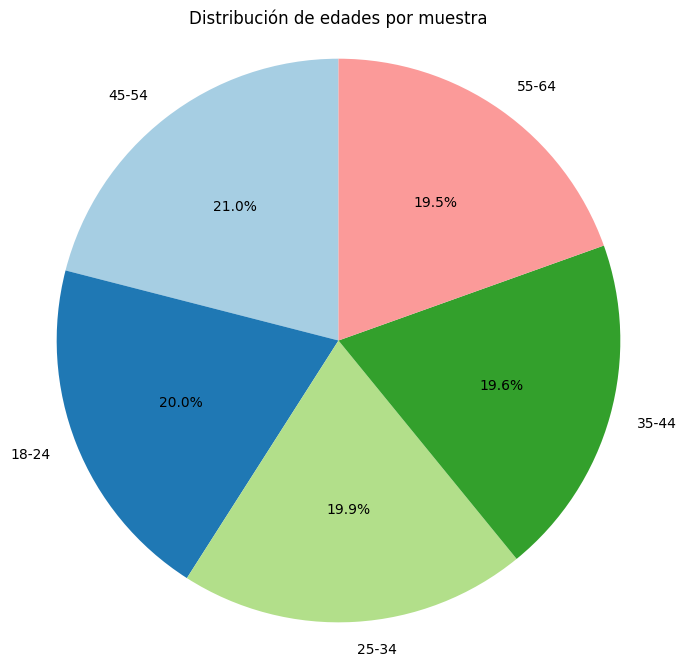

In [ ]:
# Contar la frecuencia de edades por muestra
edad_counts = df['Audience_Age_Group'].value_counts()

# Crear gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(edad_counts, labels=edad_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)  # Use edad_counts
plt.title('Distribución de edades por muestra')  # Update title
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()

La base de datos muestra que se releva la misma cantidad de campañas de marketing digital por red social. Cada medio digital representa aproximadamente el 20% del total de casos.

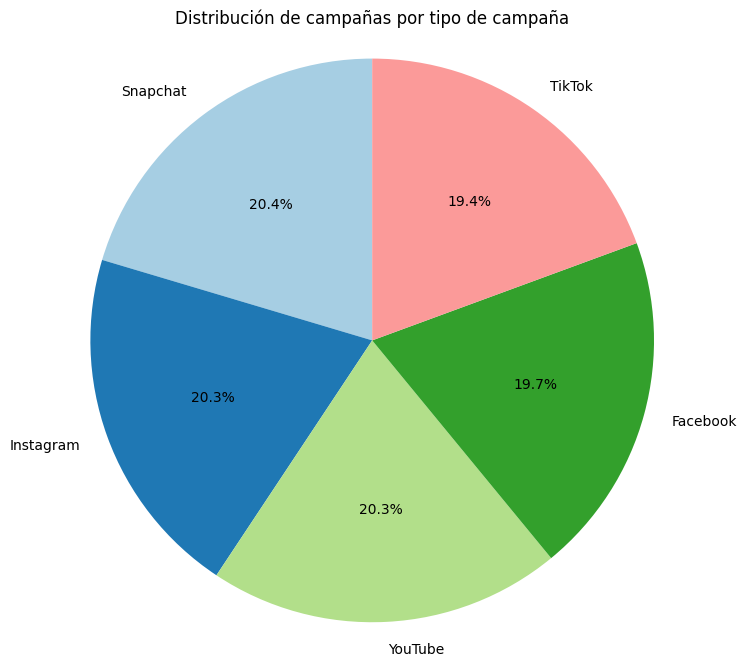

In [ ]:
# Contar la frecuencia de campañas por red social
region_counts = df['Campaign_Type'].value_counts()  # Use df

# Crear gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribución de campañas por tipo de campaña')  # Update title
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()

Se observa que cada red social representa aproximadamente un 20% de la muestra total. Los datos se distribuyen simetricamente y en proporciones similares en los distintos tipos de camapañas.

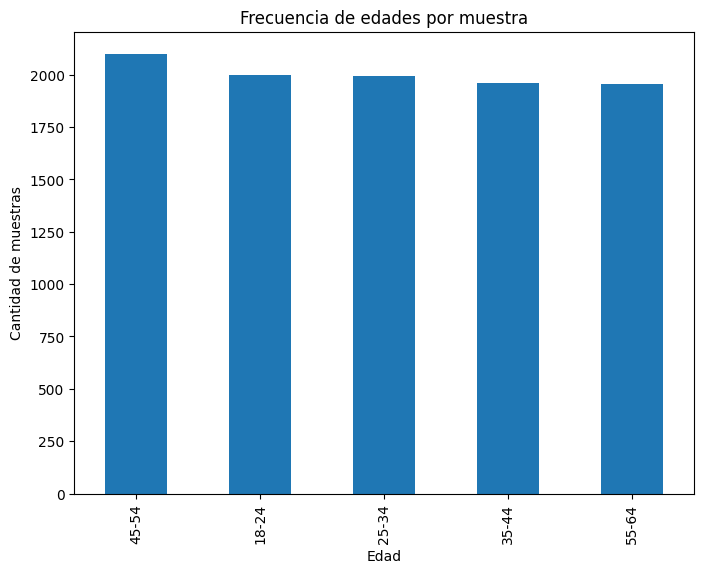

In [ ]:
# "Grafico de barras para ver edades de la muestra"

ship_mode_counts = df['Audience_Age_Group'].value_counts()  # Use 'Audience_Age_Group'
# Crear gráfico de barras para 'Ship Mode'
plt.figure(figsize=(8, 6))
ship_mode_counts.plot(kind='bar')

# Añadir título y etiquetas
plt.title('Frecuencia de edades por muestra')  # Update title
plt.xlabel('Edad')  # Update x-axis label
plt.ylabel('Cantidad de muestras')  # Update y-axis label

# Mostrar gráfico
plt.show()

De forma similiar a lo que observamos en el gráfico de torta con porcentajes, vemos que la frecuencia de edades por muestra también se reparte en partes casi iguales para cada segmento. Los 5 grupos etarios poseen una frencuencia cercana al 2000.

<ipython-input-20-7e106fef745f>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stacked_counts = df.groupby(['Audience_Age_Group', 'Campaign_Type']).size().unstack()  # Use df


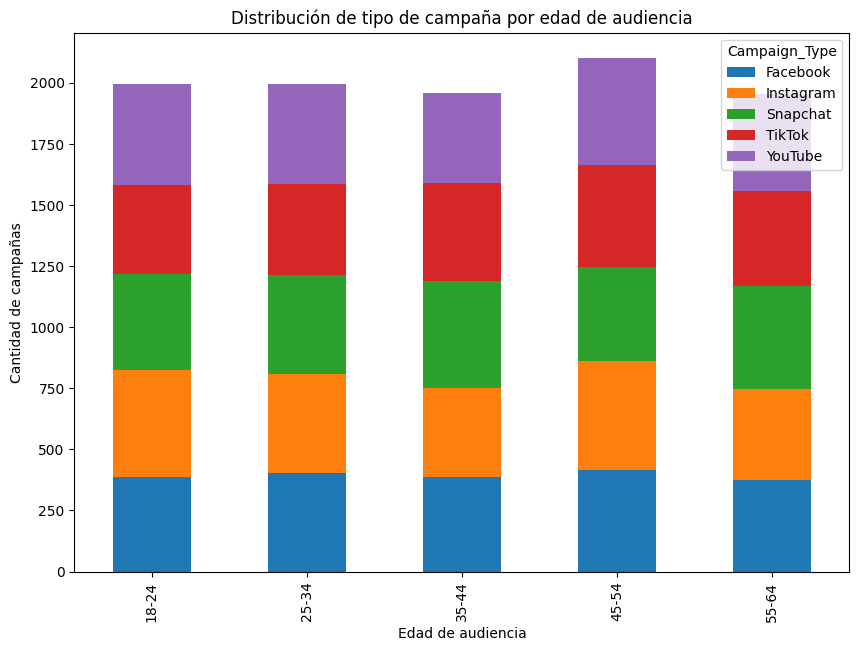

In [ ]:
# Grafico de barras apiladas para ver edad de audiencia y tipo de campaña

# Contar la frecuencia de combinaciones entre 'Region' y 'Ship Mode'
stacked_counts = df.groupby(['Audience_Age_Group', 'Campaign_Type']).size().unstack()  # Use df

# Crear gráfico de barras apiladas
stacked_counts.plot(kind='bar', stacked=True, figsize=(10, 7))

# Añadir título y etiquetas
plt.title('Distribución de tipo de campaña por edad de audiencia')  # Update title
plt.xlabel('Edad de audiencia')  # Update x-axis label
plt.ylabel('Cantidad de campañas')  # Update y-axis label

# Mostrar gráfico
plt.show()

A partir de este gráfico de barras apiladas, cruzando el tipo de campaña y la edad de la audicencia, observamos que se encuentra distruibuido de manera bastante equitativa, sin grandes diferencias de tipo de campaña por grupo etario. Como preconcepto podíamos pensar que existen algunos tipo de campaña orientados a ciertos grupos etarios, pero esto no se comprueba en los datos, en donde cada segmento de edad posee repartido de manera casi igual campañas de los 5 tipos de medios digitales.


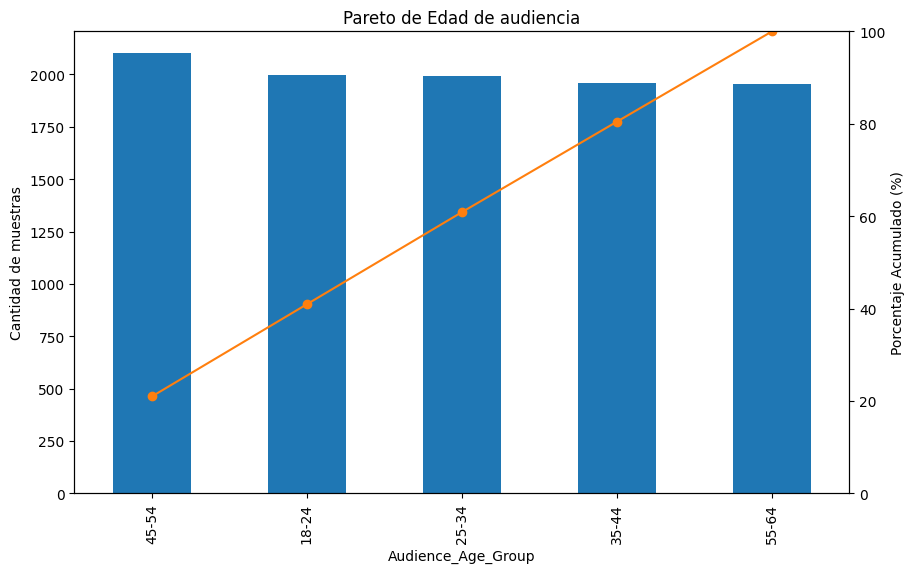

In [ ]:
# Contar la frecuencia de cada 'Edad de audiencia'
ship_mode_counts = df['Audience_Age_Group'].value_counts()  # Use df

# Calcular el porcentaje acumulado
cumulative_percentage = ship_mode_counts.cumsum() / ship_mode_counts.sum() * 100

# Crear gráfico de Pareto
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras
ship_mode_counts.plot(kind='bar', ax=ax1, color='C0')

# Añadir etiquetas y título
ax1.set_ylabel('Cantidad de muestras')  # Update y-axis label
ax1.set_title('Pareto de Edad de audiencia')  # Update title

# Gráfico de línea para porcentaje acumulado
ax2 = ax1.twinx()  # Crea un segundo eje y
ax2.plot(cumulative_percentage.values, marker='o', color='C1')  # Plot values directly
ax2.set_ylabel('Porcentaje Acumulado (%)')
ax2.set_ylim([0, 100])  # Ajusta límites del eje y

plt.show()

El grafico de Pareto sirve para identificar si un determinado grupo de edad es responsable de la mayor cantidad de resultados. Como vimos antes, dado que los resultados se distribuyen por igual entre los distintos tipos de edad y campaña, no se puede sacar conclusiones respecto a priorizar o orientar esfuerzo a un determinado valor de variable categorica para resolver pregunta de investigación.


### Relacion variables explicadas numericas con variables categoricas



<ipython-input-22-78dff8d7615c>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
<ipython-input-22-78dff8d7615c>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


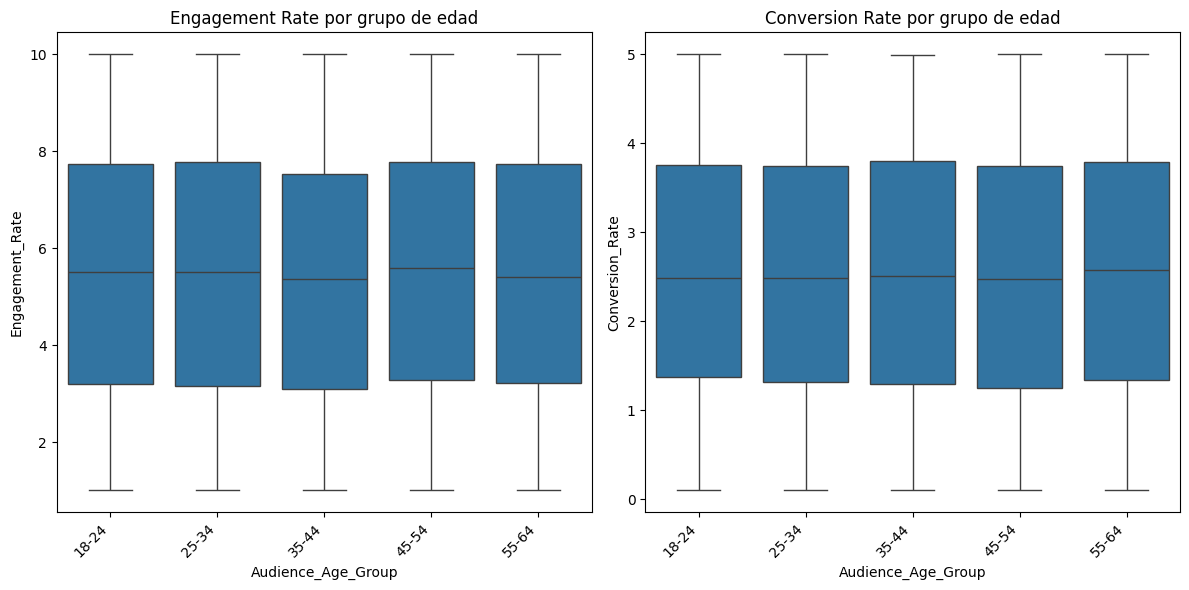

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 fila, 2 columnas

# Boxplot 1: Audience_Age_Group vs. Engagement_Rate
sns.boxplot(x='Audience_Age_Group', y='Engagement_Rate', data=df, ax=axes[0])
axes[0].set_title('Engagement Rate por grupo de edad')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Boxplot 2: Audience_Age_Group vs. Conversion_Rate
sns.boxplot(x='Audience_Age_Group', y='Conversion_Rate', data=df, ax=axes[1])
axes[1].set_title('Conversion Rate por grupo de edad')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()  # Ajustar el espaciado entre subplots
plt.show()

Se observa que para todas las categorías de edad los valores de conversion rate y engagement rate son similares. Se podría observar a priori que el hecho de destinar una campaña de marketing digital a un determinado grupo no incide de forma directa en las variables explicadas.

<ipython-input-23-4d1293eed32c>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
<ipython-input-23-4d1293eed32c>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


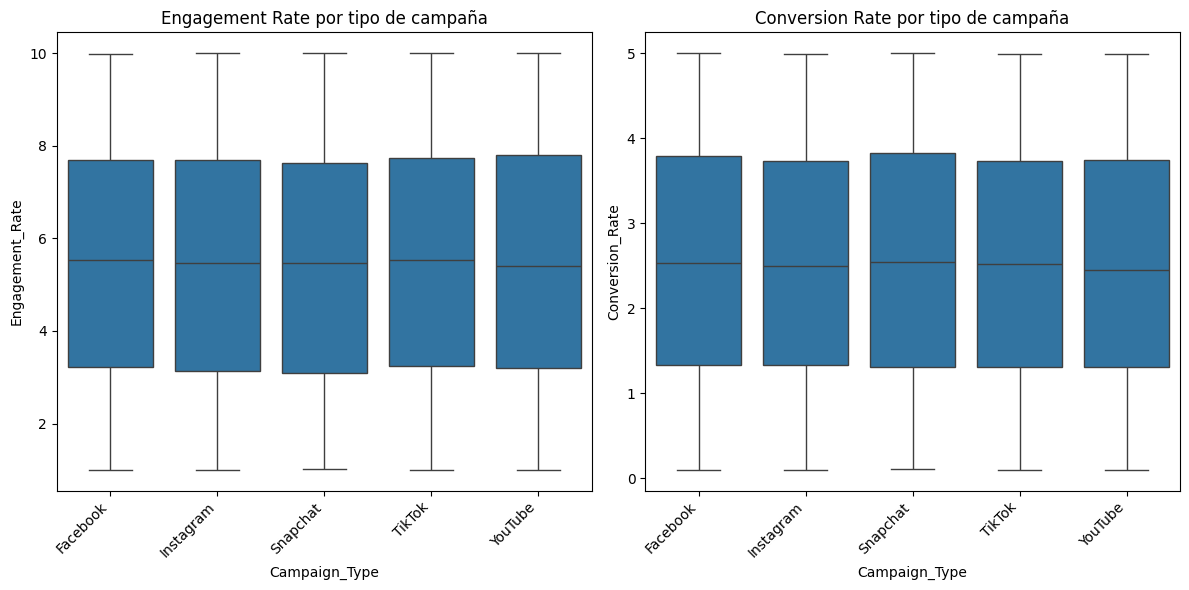

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 fila, 2 columnas

# Boxplot 1: Campaign_Type vs. Engagement_Rate
sns.boxplot(x='Campaign_Type', y='Engagement_Rate', data=df, ax=axes[0])
axes[0].set_title('Engagement Rate por tipo de campaña')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Boxplot 2: Campaign_Type vs. Conversion_Rate
sns.boxplot(x='Campaign_Type', y='Conversion_Rate', data=df, ax=axes[1])
axes[1].set_title('Conversion Rate por tipo de campaña')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()  # Ajustar el espaciado entre subplots
plt.show()


De forma similar, se observa que para todas las categorías de tipo de campaña, los resultados de engagement y conversion rate adoptan valores entre los mismos rangos.

## II.C. Exploración estadistica de variables numericas

Los valores de la media y del desvio estandar de las distintas variables numericas sugieren que los datos tienen distintas escalas. Por ende, va a ser necesario hacer feature escaling. Depende de su distribución si va a ser normalización o estandarización. Si tiene distribucion normal o gaussiana, aplico estandar estandarización. Si el algoritmo no hace suposición de la distribución deberia normalizar los datos.


In [ ]:
print(df.describe())

           Duration        Budget  Audience_Size  Engagement_Rate  \
count  10000.000000  10000.000000   10000.000000     10000.000000   
mean      30.264900     54.997248   50836.461400         5.469257   
std       17.099941     26.045130   28388.986716         2.596781   
min        1.000000     10.020753    1013.000000         1.001260   
25%       15.000000     32.332351   26391.000000         3.180886   
50%       30.000000     55.443499   51077.000000         5.477351   
75%       45.000000     77.406205   75305.250000         7.718424   
max       59.000000     99.987006   99999.000000         9.997279   

       Conversion_Rate  Audience_Age_Group_cat  Campaign_Type_cat  
count     10000.000000            10000.000000       10000.000000  
mean          2.533691                2.002100           2.003200  
std           1.409202                1.410353           1.412158  
min           0.100196                0.000000           0.000000  
25%           1.313257                




**Duración de la Campaña:** Las campañas suelen durar alrededor de 30 días, con una desviación estándar de 17 días. La campaña más corta duró 1 día y la más larga 59 días.

**Presupuesto:** El presupuesto promedio es de alrededor de 55 USD, con una variación considerable (desviación estándar de 26 USD). Los presupuestos varían desde aproximadamente 10 hasta 100 USD.

**Tamaño de la Audiencia:** Las campañas alcanzan un promedio de 51 mil personas, pero el tamaño de la audiencia varía mucho (desviación estándar de 28389 MIL).

**Engagement Rate:** Estas tasas están en una escala más pequeña. La tasa de interacción promedio es de 5.47, y se encuentra muy cercana a la mediana por lo que los datos se distribuyen simetricamente. El desvío estandar es 2,59. La tasa minima es 1 y la maxima 10.

**Conversion Rate:** La tasa de conversión promedio es de 2.53. La mediana (percentil 50) está muy cerca de la media en 2.51, lo que indica una distribución bastante simétrica.
Dispersión: La desviación estándar es de 1.41, lo que sugiere una dispersión moderada de las tasas de conversión alrededor de la media.
Rango: Las tasas de conversión varían desde un mínimo de 0.10 hasta un máximo de 4.99. En promedio, tus campañas de marketing están logrando una tasa de conversión de 2.53. Sin embargo, existe cierta variabilidad, con algunas campañas que tienen un rendimiento significativamente mejor o peor que el promedio.

Categoría de Grupo de Edad de la Audiencia (Audience_Age_Group_cat) y Categoría de Tipo de Campaña (Campaign_Type_cat). Estas columnas representan variables categóricas que han sido codificadas numéricamente.



In [ ]:
df.duplicated().sum()

0

No se observan datos duplicados en en dataframe.

In [ ]:
duplicated_rows = df[df.duplicated()]
print(duplicated_rows)

Empty DataFrame
Columns: [Campaign_Type, Duration, Budget, Audience_Size, Audience_Age_Group, Engagement_Rate, Conversion_Rate, Audience_Age_Group_cat, Campaign_Type_cat]
Index: []


No hay columnas duplicadas

Verifico si hay valores nulos. No hay.

In [ ]:
df.isnull().sum()

Campaign_Type             0
Duration                  0
Budget                    0
Audience_Size             0
Audience_Age_Group        0
Engagement_Rate           0
Conversion_Rate           0
Audience_Age_Group_cat    0
Campaign_Type_cat         0
dtype: int64

In [ ]:
df[['Campaign_Type_cat', 'Audience_Age_Group_cat' ,'Duration','Budget','Audience_Size','Engagement_Rate','Conversion_Rate']].corr()
# Select the columns you want to calculate the correlation for and then apply
# the corr() method %%

Campaign_Type_cat  Audience_Age_Group_cat  Duration  \
Campaign_Type_cat                1.000000                0.009487 -0.010588   
Audience_Age_Group_cat           0.009487                1.000000 -0.007827   
Duration                        -0.010588               -0.007827  1.000000   
Budget                           0.004024                0.018749 -0.001113   
Audience_Size                   -0.012630                0.003136  0.002921   
Engagement_Rate                  0.002710               -0.002024  0.003528   
Conversion_Rate                 -0.003824                0.001620 -0.001831   

                          Budget  Audience_Size  Engagement_Rate  \
Campaign_Type_cat       0.004024      -0.012630         0.002710   
Audience_Age_Group_cat  0.018749       0.003136        -0.002024   
Duration               -0.001113       0.002921         0.003528   
Budget                  1.000000       0.005825         0.015260   
Audience_Size           0.005825       1.000000         0.002022   
Engagement_Rate         0.015260       0.002022         1.000000   
Conversion_Rate         0.004932       0.009347        -0.009344   

                        Conversion_Rate  
Campaign_Type_cat             -0.003824  
Audience_Age_Group_cat         0.001620  
Duration                      -0.001831  
Budget                         0.004932  
Audience_Size                  0.009347  
Engagement_Rate               -0.009344  
Conversion_Rate                1.000000

Analizo si hay correlación lineal entre los datos numericos. Dado que no hay valores cercanos a 1 observo que las variables númericas tienen poca correlación entre si. Esto significa a priori que el modelo de regresión lineal podría no ser util para predecir comportamientos.

Ahora bien, baja correlación lineal no implica necesariamente ausencia de relación. Podría existir una relación no lineal entre las variables, o simplemente no hay suficiente evidencia para establecer una relación lineal con los datos disponibles.

A continuación exploro visualmente los datos numericos. A traves del **boxplot** puedo observar la distribución de una variable numerica. Podemos ver: mediana, cuartiles, rango y dispersión, simetría y podemos identificar outliers.


En este caso, vemos que no hay valores atipicos en las variables numericas analizadas


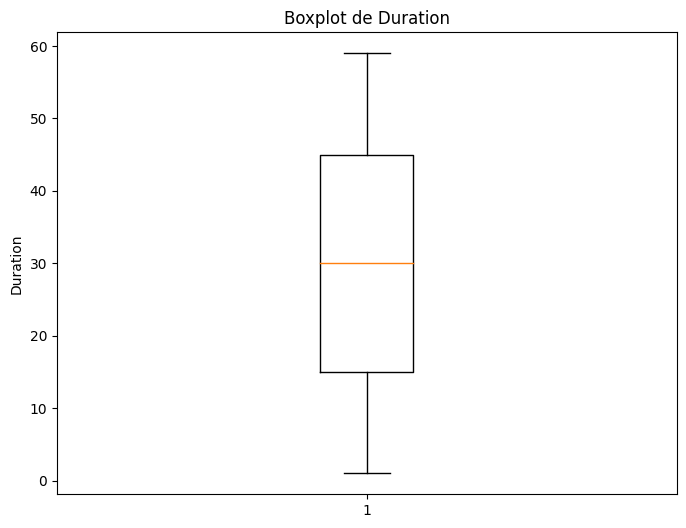

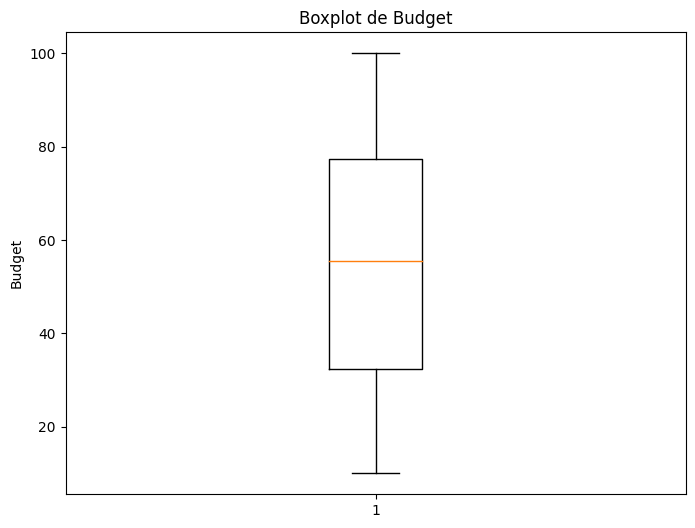

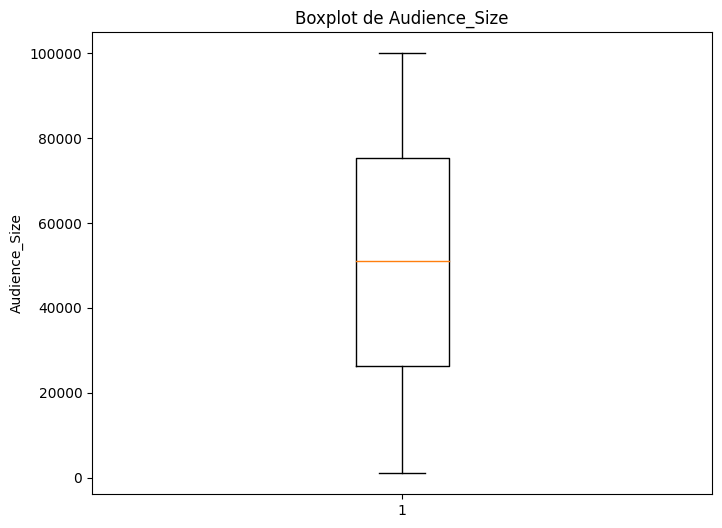

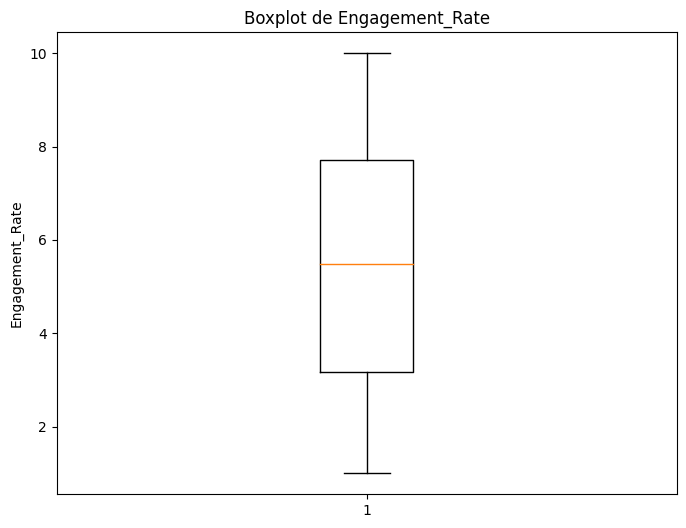

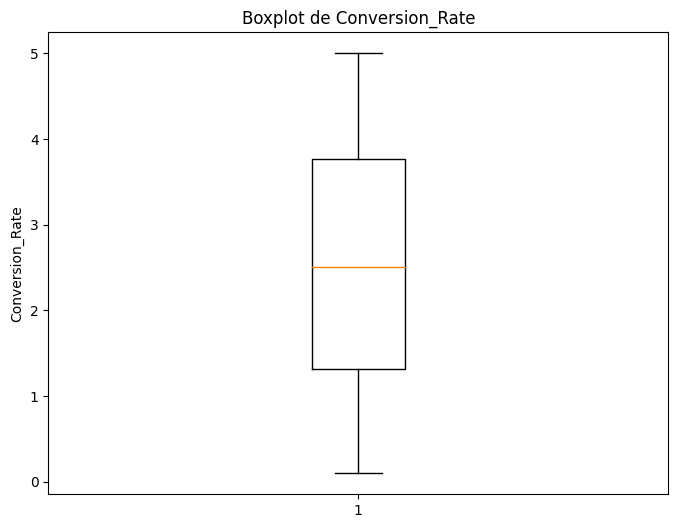

In [ ]:
import matplotlib.pyplot as plt

# Seleccionar las columnas numéricas
numerical_cols = ['Duration', 'Budget', 'Audience_Size', 'Engagement_Rate', 'Conversion_Rate']

# Crear un boxplot para cada variable por separado
for col in numerical_cols:
    plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura
    plt.boxplot(df[col])
    plt.title(f'Boxplot de {col}')  # Título con el nombre de la variable
    plt.ylabel(col)  # Etiqueta del eje y con el nombre de la variable
    plt.show()

Luego avanzo con los **histogramas** que sirven para visualizar la distribución de frecuencia de una variable numérica.

eL Eje X(horizontal) representa los valores de las variable numericas y el eje Y (vertical) representa la frecuencia de las observaciones en cada intervalo de valor.


Del analisis de este historgrama, se puede verificar que no hay valores atipicos de las distintas variables numericas, que la distribuciión es simetrica en lineas generales. La variable "Duration" es la unica que tiene menos frecuencia en los valores intermedios.

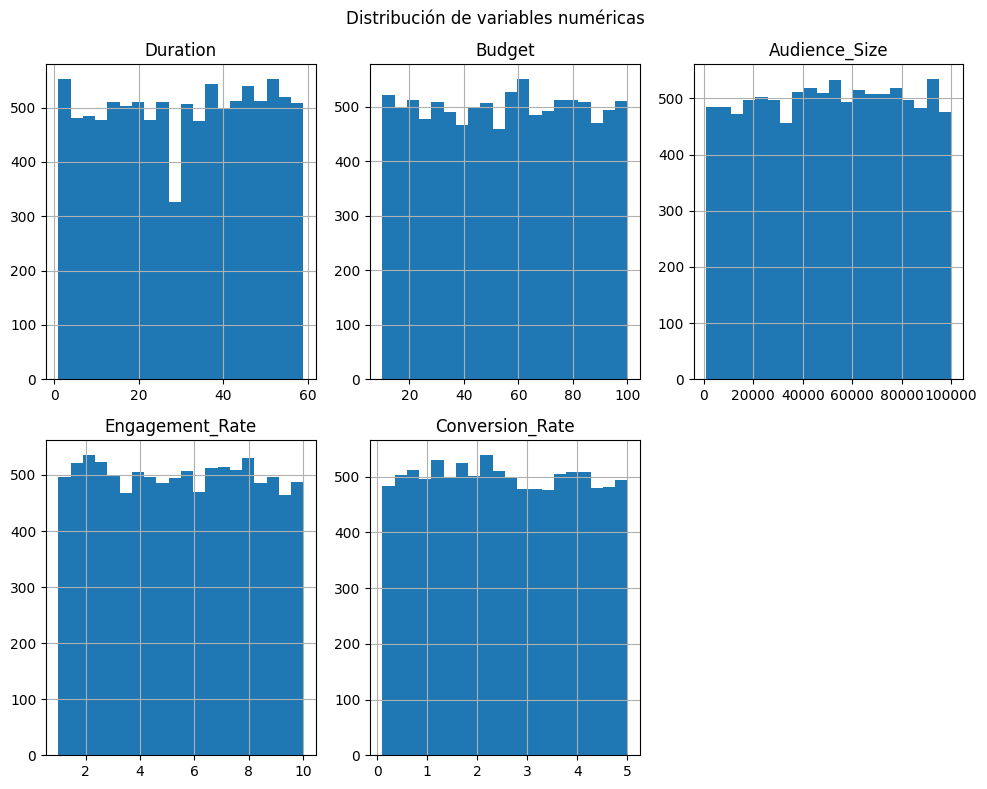

In [ ]:
df[['Duration', 'Budget', 'Audience_Size','Engagement_Rate','Conversion_Rate']].hist(bins=20, figsize=(10, 8), layout=(2, 3))

# Añadir título general
plt.suptitle('Distribución de variables numéricas')
plt.tight_layout()  # Ajusta el espaciado entre subplots
plt.show()

Exploramos **graficos de dispersión** para ver la relación entre dos variables.  Cada punto en el gráfico representa una observación, con su posición determinada por los valores de las dos variables. Este gráfico nos permite ver la relación entre dos variables, su correlación y posibles valores atipicos.


En el caso de esta muestra, no vemos correlación lineal ni logaritmica entre las variables explicativas y las explicadas.


Variables explicativas: Campaign_Type, Duration, Budget, Audience_Size, Audience_Age_Group

Variables explicadas:Engagement_Rate, Conversion_Rate


De los graficos de dispersión se concluye que hay una gran dispersion de datos en toda la superficie del gráficos. Superficie casi pintada en su totalidad. Es decir, los datos no se concentran en ninguna parte especifica del gráfico.

A modo de ejemplo, duraciones muy disimiles de campañas pueden resultar en todo tipo de resultados de engagement y conversion rate. O bien distinto presupuesto asignado puede resultar en campañas exitosas o no exitosas. Esto último nos dificulta llegar a algún tipo de conclusión a partir del análisis de los datos.




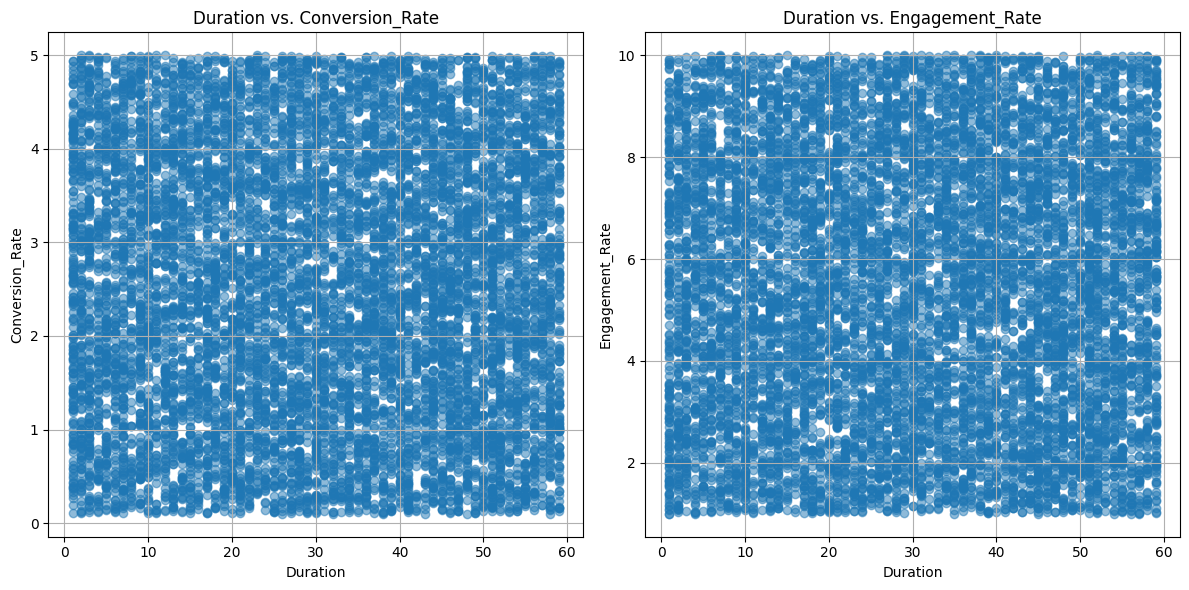

In [ ]:
import matplotlib.pyplot as plt

# Crear subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 fila, 2 columnas

# Gráfico 1: Duration vs. Conversion_Rate
axes[0].scatter(df['Duration'], df['Conversion_Rate'], alpha=0.5)
axes[0].set_title('Duration vs. Conversion_Rate')
axes[0].set_xlabel('Duration')
axes[0].set_ylabel('Conversion_Rate')
axes[0].grid(True)

# Gráfico 2: Duration vs. Engagement_Rate
axes[1].scatter(df['Duration'], df['Engagement_Rate'], alpha=0.5)
axes[1].set_title('Duration vs. Engagement_Rate')
axes[1].set_xlabel('Duration')
axes[1].set_ylabel('Engagement_Rate')
axes[1].grid(True)

plt.tight_layout()  # Ajustar el espaciado entre subplots
plt.show()


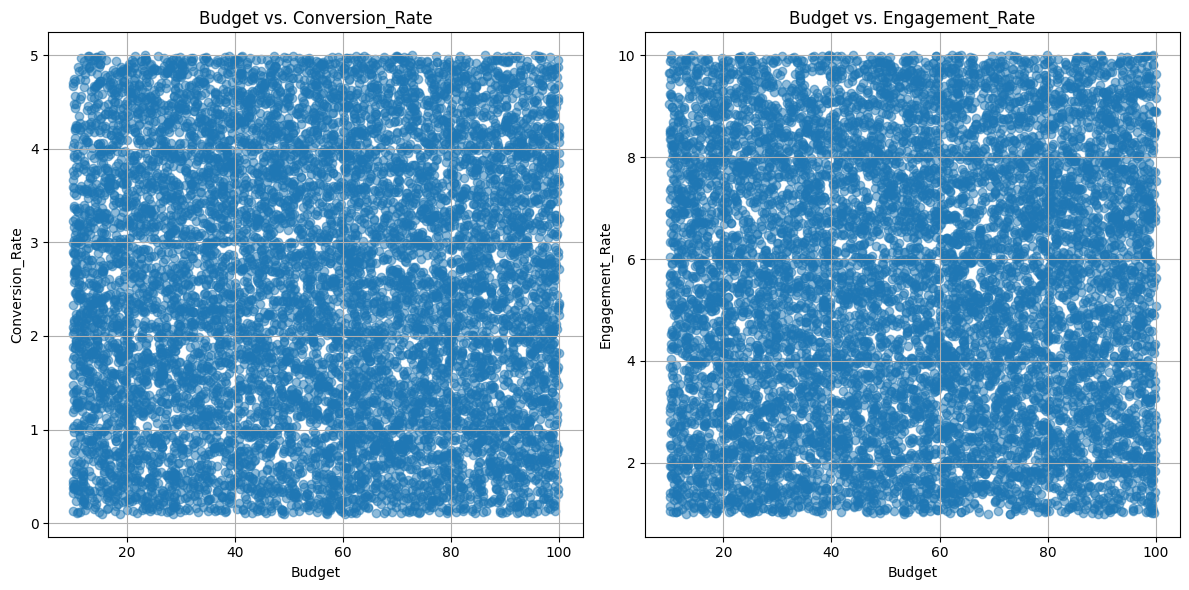

In [ ]:
# Crear subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 fila, 2 columnas

# Gráfico 1: Budget vs. Conversion_Rate
axes[0].scatter(df['Budget'], df['Conversion_Rate'], alpha=0.5)
axes[0].set_title('Budget vs. Conversion_Rate')
axes[0].set_xlabel('Budget')
axes[0].set_ylabel('Conversion_Rate')
axes[0].grid(True)

# Gráfico 2: Budget vs. Engagement_Rate
axes[1].scatter(df['Budget'], df['Engagement_Rate'], alpha=0.5)
axes[1].set_title('Budget vs. Engagement_Rate')
axes[1].set_xlabel('Budget')
axes[1].set_ylabel('Engagement_Rate')
axes[1].grid(True)

plt.tight_layout()  # Ajustar el espaciado entre subplots
plt.show()

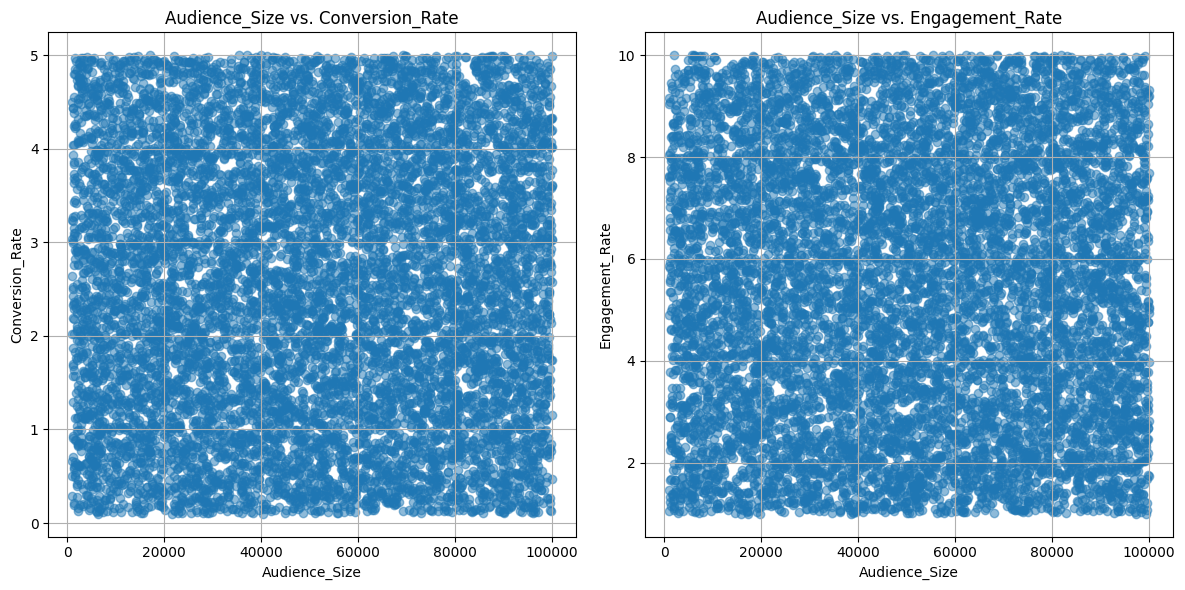

In [ ]:
# Crear subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 fila, 2 columnas

# Gráfico 1: Audience_Size vs. Conversion_Rate
axes[0].scatter(df['Audience_Size'], df['Conversion_Rate'], alpha=0.5)
axes[0].set_title('Audience_Size vs. Conversion_Rate')
axes[0].set_xlabel('Audience_Size')
axes[0].set_ylabel('Conversion_Rate')
axes[0].grid(True)

# Gráfico 2: Audience_Size vs. Engagement_Rate
axes[1].scatter(df['Audience_Size'], df['Engagement_Rate'], alpha=0.5)
axes[1].set_title('Audience_Size vs. Engagement_Rate')
axes[1].set_xlabel('Audience_Size')
axes[1].set_ylabel('Engagement_Rate')
axes[1].grid(True)

plt.tight_layout()  # Ajustar el espaciado entre subplots
plt.show()

Verificación adicional de outliers. No hay outliers

In [ ]:
# Calcular Q1 y Q3 para la columna 'Budget'
Q1 = df['Budget'].quantile(0.25)
Q3 = df['Budget'].quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers basados en IQR
outliers = df[(df['Budget'] < (Q1 - 1.5 * IQR)) | (df['Budget'] > (Q3 + 1.5 * IQR))]
print(outliers)

Empty DataFrame
Columns: [Campaign_Type, Duration, Budget, Audience_Size, Audience_Age_Group, Engagement_Rate, Conversion_Rate, Audience_Age_Group_cat, Campaign_Type_cat]
Index: []


# III. Modelado

## III.A. Descarte de aprendizaje supervisado

Descartamos la opción de regresion lineal dado los coeficientes de correlacion bajos y que los gráficos de dispersión no dan indicios que haya regresión lineal.


Tambien descartamos la opción de regresión logaritmica dado que se usa para explicar variables categoricas. En este caso, al tratarse de las tasas de engagement y de conversion que adoptan valores numericos continuos decidimos descartar este tipo de modelos.

El descarte del aprendizaje supervisado significa que en el modelo no va a haber variables explicadas y explicativas y que no tenemos que dividir los datos en conjuntos de entrenamiento y prueba.

## III.B. Aprendizaje no supervisado. Modelo de clusterización

Intentaremos realizar un agrupamiento no supervisado de datos en los registros de los datos de campañas digitales de marketing. La segmentación de las campañas es la práctica de separar las mismas en grupos que reflejan similitudes en cada grupo y maximizar la distancia entre distintos grupos. La idea seria poder encontrar ciertas características en común de las distintas campañas, entendiendo también cuáles fueron más exitosas y por qué. Entendemos que los clusters podrían ayudarnos a identificar segmentos ocultos en este datatset que no posee correlaciones lineales fuertes. Las técnicas de clustering puede ayudarnos a encontrar grupos o segmentos de campañas que comparten similitudes en variables como el presupuesto, el tamaño de la audiencia, la tasa de participación, entre otras.
En este mismo sentido, es posible a partir de este modelo, encontrar ciertas relaciones complejas y no  lineales, a simple vista ocultas.

El objetivo sería lograr agrupar campañas similares lo que permitiría ajustar estrategias de marketing a cada grupo en lugar de aplicar una estrategia general, lo que puede aumentar la eficiencia y eficacia.

En este modelo no separamos entre variables de prueba y entrenamiento, ni tenemos variables dependientes e independientes

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Pasos previos para realizar la operación de clustering :

*   Escalar los datos usando StandardScales de sklearn
*   Hacer PCA para reducir la dimensionalidad del dataframe



---



### Escalado de datos y reducción de dimensionalidad . + otras visualizaciones previas para revalidar

Escalado de datos

In [ ]:
# Copiamos los datos
data_scaled = df.copy()

# Removemos del data set las columnas referentes a promociones
cols_del = ['Duration', 'Budget', 'Audience_Size', 'Engagement_Rate', 'Conversion_Rate', "Audience_Age_Group_cat", "Campaign_Type_cat"]
data_scaled = data_scaled.drop(cols_del, axis=1)

# Seleccionar solo las características numéricas para escalar
numerical_features = ['Duration', 'Budget', 'Audience_Size', 'Engagement_Rate', 'Conversion_Rate', "Audience_Age_Group_cat", "Campaign_Type_cat"]  # Add any other numerical columns
data_scaled_num = df[numerical_features] # Use original data for numerical subset

# Escalar las características numéricas
scaler = StandardScaler()
scaler.fit(data_scaled_num)  # Fit only on numerical data
data_scaled_num = pd.DataFrame(scaler.transform(data_scaled_num), columns=numerical_features, index=df.index) # index for merging

# Combinar las características escaladas con las categóricas
data_scaled = data_scaled.merge(data_scaled_num, left_index=True, right_index=True) # Merge with original data with dropped columns

In [ ]:
data_scaled.describe(include=[int, float])

Duration        Budget  Audience_Size  Engagement_Rate  \
count  1.000000e+04  1.000000e+04   1.000000e+04     1.000000e+04   
mean  -4.547474e-17 -7.318590e-17  -2.842171e-18     3.524292e-16   
std    1.000050e+00  1.000050e+00   1.000050e+00     1.000050e+00   
min   -1.711489e+00 -1.726954e+00  -1.755116e+00    -1.720677e+00   
25%   -8.927319e-01 -8.702598e-01  -8.611327e-01    -8.812776e-01   
50%   -1.549206e-02  1.713465e-02   8.473378e-03     3.117296e-03   
75%    8.617478e-01  8.604326e-01   8.619544e-01     8.661799e-01   
max    1.680505e+00  1.727463e+00   1.731833e+00     1.743793e+00   

       Conversion_Rate  Audience_Age_Group_cat  Campaign_Type_cat  
count     1.000000e+04            1.000000e+04       1.000000e+04  
mean      3.065992e-16           -1.918465e-17      -9.237056e-17  
std       1.000050e+00            1.000050e+00       1.000050e+00  
min      -1.726947e+00           -1.419645e+00      -1.418609e+00  
25%      -8.660897e-01           -7.105671e-01      -7.104378e-01  
50%      -1.696412e-02           -1.489064e-03      -2.266149e-03  
75%       8.731506e-01            7.075889e-01       7.059055e-01  
max       1.750074e+00            1.416667e+00       1.414077e+00

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

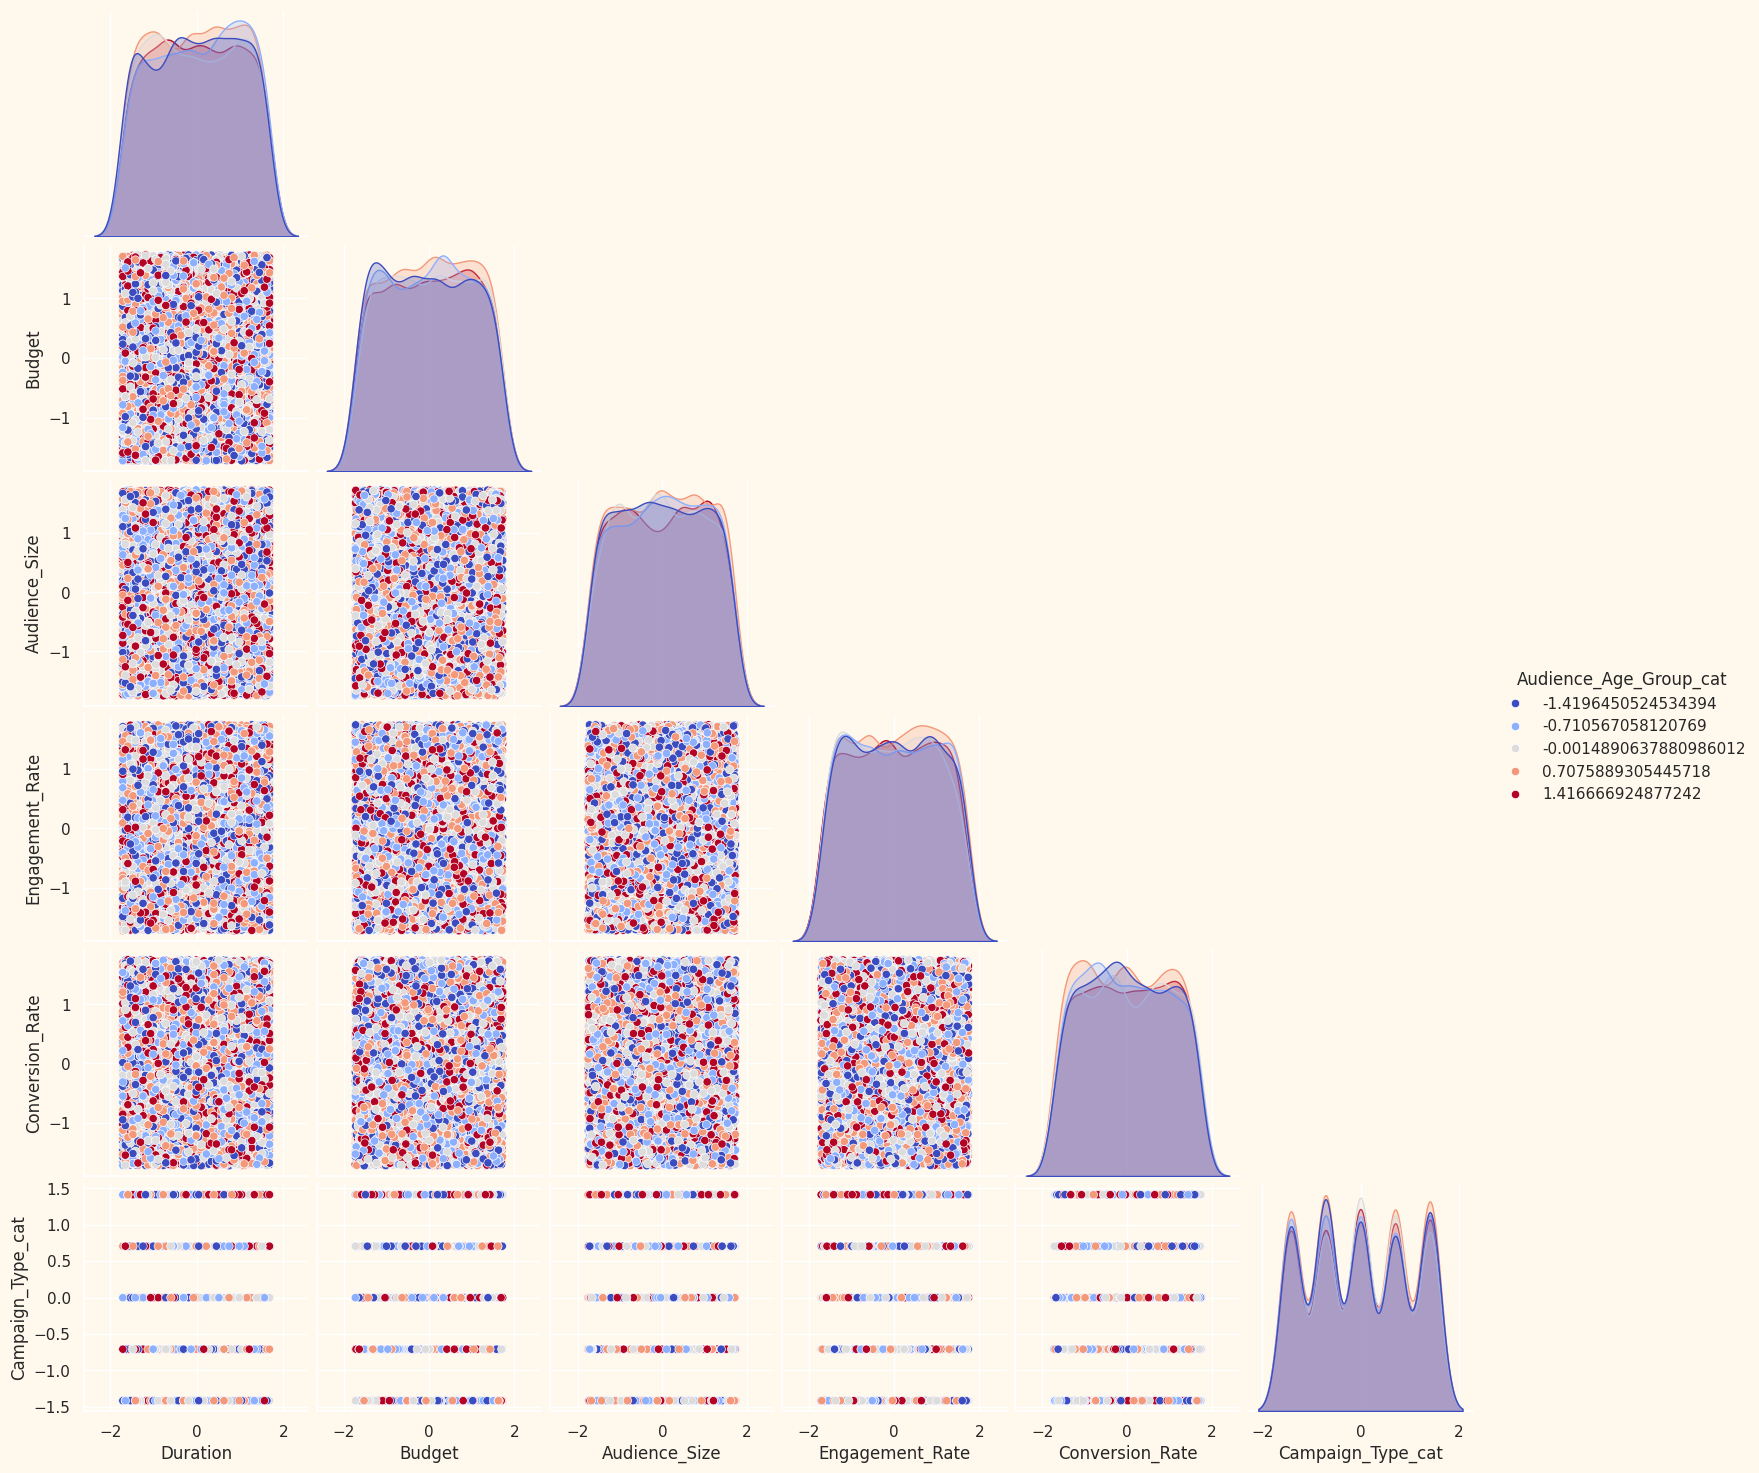

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})

# Plotting following features
To_Plot = ["Duration", "Budget", "Audience_Size", "Engagement_Rate", "Conversion_Rate", "Audience_Age_Group_cat", "Campaign_Type_cat"]

print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()

# Use 'Audience_Age_Group_cat' or 'Campaign_Type_cat' for hue
sns.pairplot(data_scaled[To_Plot], hue="Audience_Age_Group_cat", palette='coolwarm', corner=True)
plt.show()

Los diferentes grupos etarios no muestran grandes diferencias en cuanto a cómo se distribuyen las variables como presupuesto, tamaño de audiencia o tasas de participación y conversión.
La relación entre las variables es bastante dispersa, lo que indica que probablemente no haya correlaciones fuertes o claras entre la mayoría de ellas en este conjunto de datos, como ya veniamos observando.

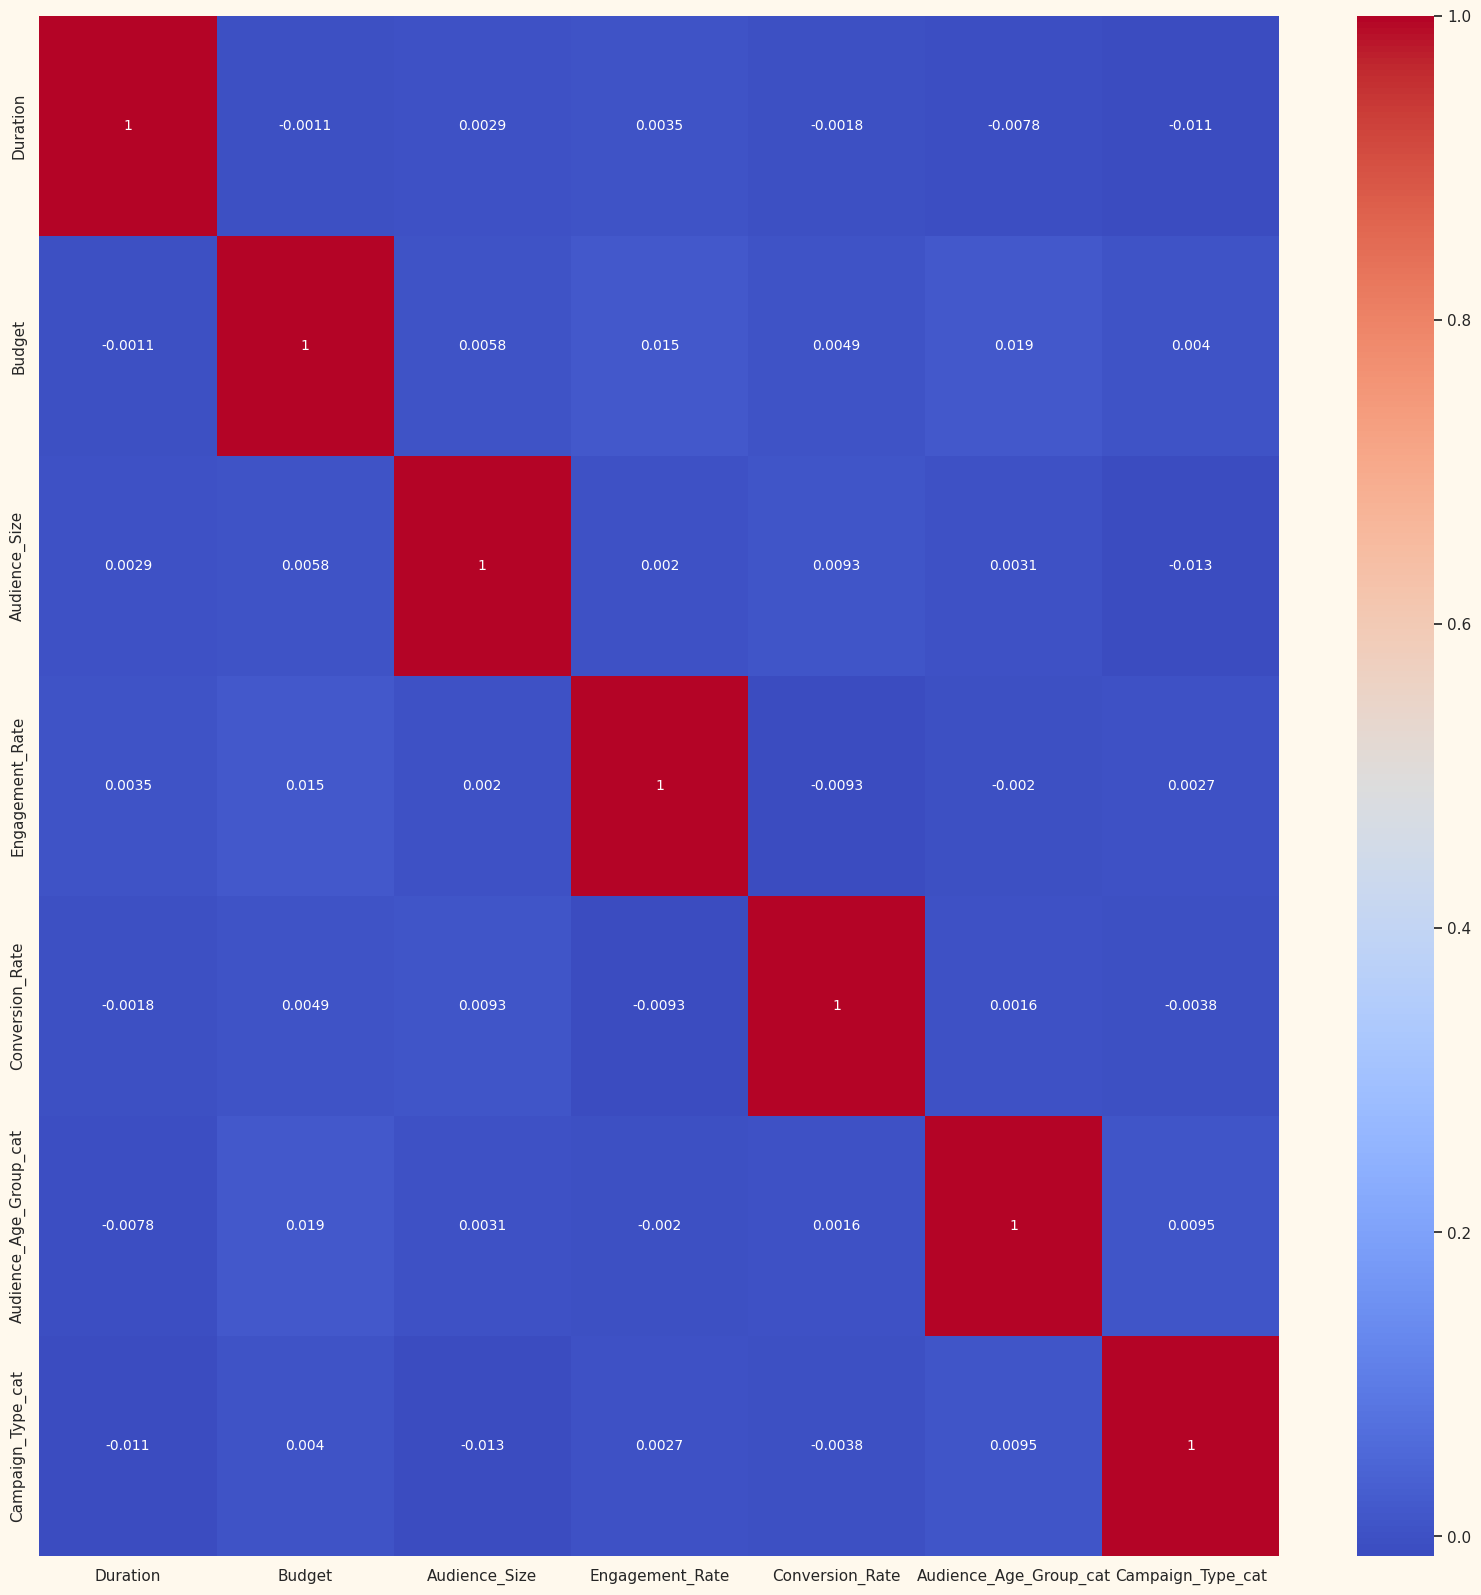

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_df = data_scaled.select_dtypes(include=['number'])

plt.figure(figsize=(20,20))
sns.heatmap(
    data=numerical_df.corr(),  # Use correlation of numerical columns
    cmap='coolwarm',
    annot=True,
    annot_kws={'size': 10}
);

En la matriz continuamos afirmando la baja corelación entre las variables.

Reducir la dimensionalidad de datos. Utilizaremos el análisis de componentes principales para reducir la dimensionalidad del conjunto de datos y de esta manera ayudar a que el clustering funcione mejor.

In [ ]:
from sklearn.decomposition import PCA

# Creamos el modelo para PCA
pca = PCA()
# Entrenamos el modelo y transformamos los datos
scaledPCA = pca.fit_transform(data_scaled[numerical_features])  # Use scaled numerical features from data_scaled

### Definición de cantidad de clusters para MODELOS NO SUPERVISADOS

In [ ]:
var = pca.explained_variance_ratio_
len(var)


7

[]

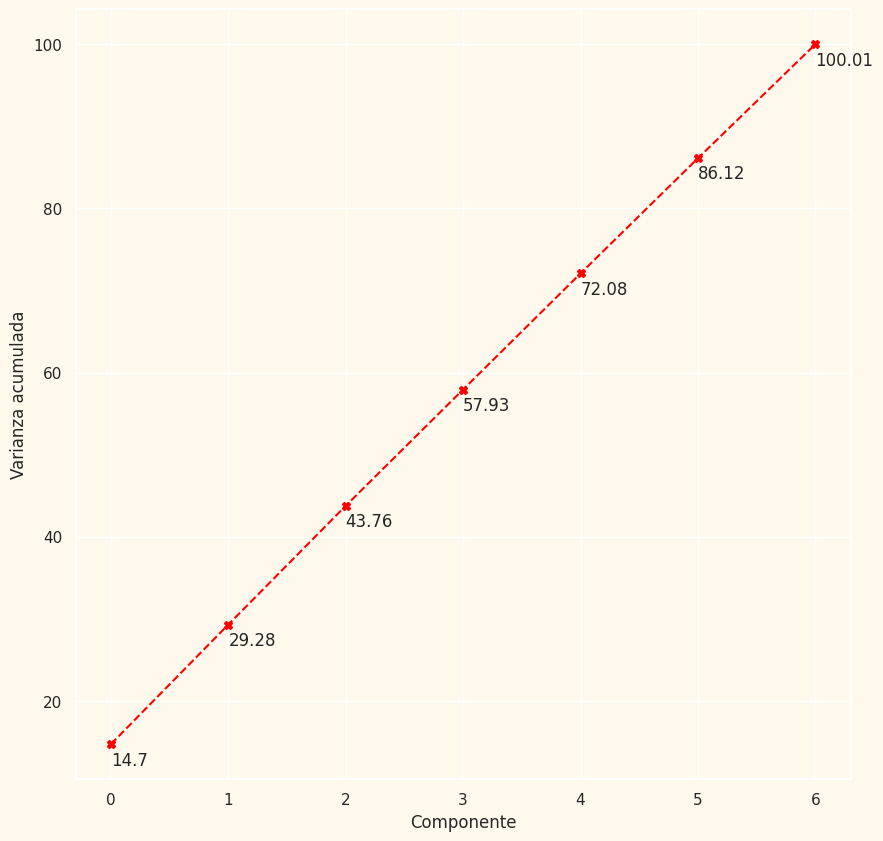

In [ ]:
# Varianza acumulada

import numpy as np
accVar = np.cumsum(np.round(var, decimals = 4) * 100)
# Lista para guardar el número del componente
components = np.arange(0, len(var))

plt.figure(figsize = (10, 10))
# Iteramos a través de los componentes y su respectiva varianza acumulada
for component, aV in zip(components, accVar):
    plt.annotate(round(aV, 2), xy = (component, aV - 2.5))

plt.plot(accVar, color = "red", marker = "X", linestyle = "--")
plt.xlabel("Componente")
plt.ylabel("Varianza acumulada")
plt.plot()

Varianza capturada por componentes

Una varianza acumulada del 80% para los primeros 4 componentes principales

---

significa que estos 4 componentes juntos explican el 80% de la variabilidad total en los datos originales.
Cuanto mayor sea la varianza acumulada para un conjunto dado de componentes principales, mejor será su capacidad para representar la información original de los datos.

Todo indica que conviene separar los grupos en 5.

Para el clustering reduciremos la cantidad de columnas 4 y aun así se conserva el 80% de la varianza

In [ ]:
# Creamos un df con los datos escalados y con el PCA aplicado
dfScaledPCA = pd.DataFrame(scaledPCA) # Fixed to pd.DataFrame
# Eliminamos los componentes más allá del cuarto (índice 3)
dfScaledPCA = dfScaledPCA.iloc[:, :4]  # Select first 4 columns
dfScaledPCA.columns = ['col1', 'col2', 'col3', 'col4']
dfScaledPCA.describe().T

count          mean       std       min       25%       50%       75%  \
col1  10000.0  4.405365e-17  1.014362 -3.189425 -0.701917  0.012280  0.697513   
col2  10000.0  7.105427e-18  1.010234 -3.165341 -0.707903  0.014936  0.712067   
col3  10000.0 -7.105427e-19  1.006743 -2.927059 -0.699992  0.002036  0.705652   
col4  10000.0 -5.684342e-18  0.995935 -2.952441 -0.713859  0.003008  0.722847   

           max  
col1  3.126126  
col2  3.137122  
col3  3.014257  
col4  3.171603

Uso elbolw como forma alternativa para determinar numero de clusters y me dice que deberian ser 5 clusters.

Elbow Method para determinar el número de clusters


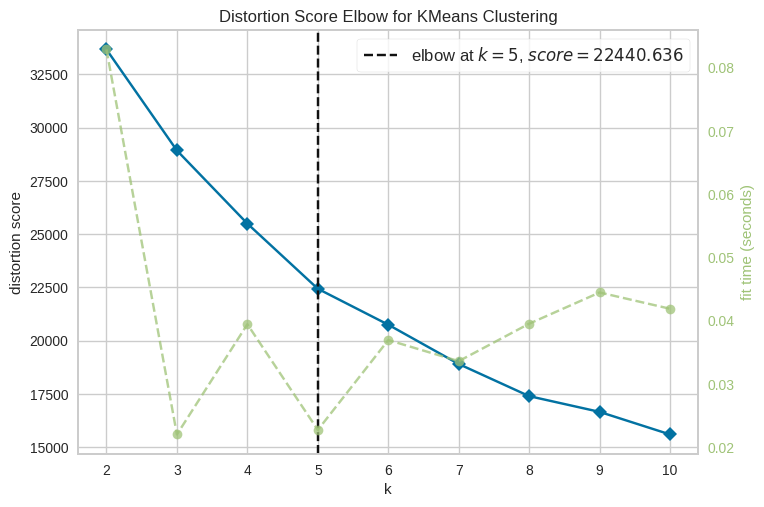

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import pandas as pd

print('Elbow Method para determinar el número de clusters')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(dfScaledPCA)
Elbow_M.show()

Hacemos aglomerative clustering

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering


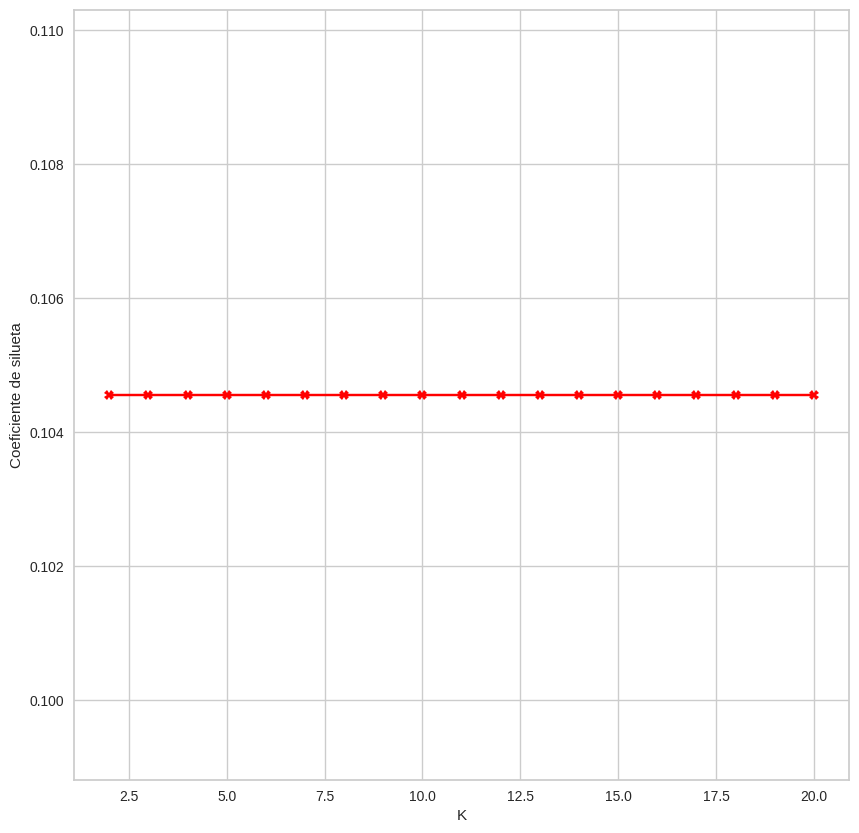

In [ ]:
silhouetteScores = []
# Posibles clusters
K = range(2, 21)
# Recorremos el rango de K
for k in K:
    # Creamos el modelo de K clusters
    AC = AgglomerativeClustering(n_clusters=5)
    # Hacemos unas predicciones
    predictions = AC.fit_predict(dfScaledPCA)
    # Calculamos el coeficiente de silueta y lo agregamos a la lista
    silhouetteScores.append(silhouette_score(dfScaledPCA, predictions))
plt.figure(figsize = (10, 10))
plt.plot(K, silhouetteScores, color = "red", marker = "X")
plt.xlabel("K")
plt.ylabel("Coeficiente de silueta")
plt.show()

***No entendemos mucho esta forma***

In [ ]:
c_data = df.copy()  # Assuming 'df' is your original DataFrame

In [ ]:
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
yhat_AC = AC.fit_predict(dfScaledPCA)
dfScaledPCA["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
c_data["Clusters"]= yhat_AC

Metrica para evaluar silueta de

In [ ]:
silhouette_score(dfScaledPCA, yhat_AC)

OK. Un valor de coeficiente de silueta de 0.26 indica una estructura de


clusters débil o poco definida en tus datos.

Estructura de clusters débil: Los clusters no están bien definidos o separados entre sí.
Puntos cerca de la frontera: Hay puntos que podrían pertenecer a más de un cluster o que están cerca de la frontera entre clusters.
Posible solapamiento: Los clusters pueden solaparse en cierta medida.


Interpretación del coeficiente de silueta:

Rango: El coeficiente de silueta varía entre -1 y 1.
Valores cercanos a 1: Indican que los puntos están bien agrupados dentro de sus clusters y bien separados de otros clusters.
Valores cercanos a 0: Sugieren que los puntos están cerca de la frontera entre clusters o que la estructura de clusters es débil.
Valores negativos: Indican que los puntos pueden haber sido asignados al cluster incorrecto.


### Eleccion de modelo 1_ KMINS

In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
from sklearn.cluster import KMeans

# Assuming you have scaled data in dfScaledPCA
segmentation_std = dfScaledPCA[['col1', 'col2', 'col3', 'col4']]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

Ajusto modelo a conjunto de datos total

In [ ]:
kmeans.fit(segmentation_std)

Le asigno lavels

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Assuming dfScaledPCA contains your scaled data
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(dfScaledPCA[['col1', 'col2', 'col3', 'col4']])

df_segm_kmeans = df.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

Analisis de como se conforma cada grupo y como se distribuyen entre los 5 grupos. Caracteristicas asignadas automaticamente

In [ ]:
df_segm_kmeans.head()

Algunas caracteristicas de cada grupo

Grupo 0:
Principalmente instagram-
Mayor presupuesto relativo asignado-
Audiencia de tañano mediano- edad promedio 35-44- logra un alto engagement rate pero bajo conversion rate

Grupo 1:
principalemente campañas en youtube, de baja duración, presupuesto en la media, audiencia grande, para una edad de 18-24 principalente, con bajo engagement pero relativamente alta tasa de conversion

Grupo 2: campañas principalmente en ig, principalmente para el grupo de 25 a 34 años, para audiencias muy grandes, que logran un engagement medio y la más baja tasa de conversion. MALA CAMPAÑA.

Grupo 3: Campaña destinada principalmente a youtube, de bajo presupuesto, duracion intermedia, principalmente al rango etareo de 25-34 que logra buen engagement pero baja tasa de conversion aunque no la peor

Grupo 4: Principalmente Youtube, duración media, presupuesto relativamente bajo, asia audiencia muy chica, principalmente joven de 18-24, llega a una buena tasa de conversion pero a una baja tasa de engagement

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_segm_kmeans, 'Engagement_Rate', 'Budget', and 'Segment K-means' columns exist

x_axis = df_segm_kmeans['Engagement_Rate']
y_axis = df_segm_kmeans['Budget']

plt.figure(figsize=(10, 8))

# Use 'Segment K-means' for hue
sns.scatterplot(x=x_axis, y=y_axis, hue=df_segm_kmeans['Segment K-means'], palette=['g', 'r', 'c', 'm'])

plt.title('Segmentation K-means')
plt.show()

No se visualiza una distribución de grupos util, dada la dispersion de los datos. Talvez es por las multiples caracteristicas que los definen

Indice de situela de kmeans. Mide que tan similar es un objeto a su propio cluster en comparacion con otros clusters.

-1 mala agrupacion
1 agrupación optima


por ende, unna puntuación de silueta de 0.131 indica una estructura de clústeres débil o poco definida en los datos.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Aplicar K-means
kmeans = KMeans(n_clusters=5)
kmeans.fit(dfScaledPCA)  # Corrected variable name

# Predecir las etiquetas
labels = kmeans.labels_

# Calcular el Silhouette Score
# Ensure segmentation_std has the same number of samples and is numeric
silhouette_avg = silhouette_score(dfScaledPCA[['col1', 'col2', 'col3', 'col4']], labels)  # Use feature columns from dfScaledPCA

print(f'Silhouette Score: {silhouette_avg}')

### Eleccion modelo 2_ DBSCAN
Elegimos probar con este método de clusterización, ya que se ajusta mejor a datos de mayor dimensionalidad, teniendo en cuenta que nuestro dataset tiene 7 columnas.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

In [ ]:
neighbors=NearestNeighbors(n_neighbors=3)
neighbors_fit=neighbors.fit(dfScaledPCA)
distances, indices=neighbors_fit.kneighbors(dfScaledPCA)

Definición de cantidad de grupos

técnica de la rodilla para corroborar distancia entre los grupos y definir cuantos grupos debieramos analizar


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

distances = np.sort(distances, axis=0)
distances = distances[:, 1]

# Install yellowbrick if needed
!pip install yellowbrick==1.5

# Import KElbowVisualizer (separate line)
from yellowbrick.cluster import KElbowVisualizer

plt.plot(distances)
plt.show() # Add plt.show() to display the plot

In [ ]:
!pip install yellowbrick==1.5
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans  # Import KMeans
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method para determinar el número de clusters')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(dfScaledPCA)
Elbow_M.show()

In [ ]:
eps_values=np.arange(0.5,1.0,0.1)
min_samples=np.arange(2,20)

In [ ]:
from itertools import product

In [ ]:
from itertools import product
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

dbscan_params = list(product(eps_values, min_samples))
no_of_clusters = []
sil_score = []

for p in dbscan_params:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(dfScaledPCA[['col1', 'col2', 'col3', 'col4']])  # Use feature columns

    # Check if there are at least two clusters for silhouette score calculation
    if len(np.unique(y_dbscan)) > 1:
        try:
            sil_score.append(silhouette_score(dfScaledPCA[['col1', 'col2', 'col3', 'col4']], y_dbscan))  # Use feature columns
        except ValueError:  # Handle ValueError for single cluster case
            sil_score.append(0)
    else:
        sil_score.append(0)  # Assign 0 for single cluster case

    no_of_clusters.append(len(np.unique(y_dbscan)))


In [ ]:
import pandas as pd

# ... (Tu código anterior) ...

# Crear un DataFrame con los resultados
df_param_tuning = pd.DataFrame.from_records(dbscan_params, columns=['Eps', 'Min_samples'])
df_param_tuning['sil_score'] = sil_score
df_param_tuning['n_clusters'] = no_of_clusters

# Mostrar el DataFrame
print(df_param_tuning)

# Encontrar la mejor puntuación de silueta y los parámetros correspondientes
best_index = df_param_tuning['sil_score'].idxmax()
best_params = df_param_tuning.loc[best_index, ['Eps', 'Min_samples']].values
best_score = df_param_tuning.loc[best_index, 'sil_score']

print(f"\nMejores parámetros: Eps = {best_params[0]}, Min_samples = {best_params[1]}")
print(f"Mejor puntuación de silueta: {best_score}")

Los resultados que has obtenido indican que los mejores parámetros para DBSCAN en tu caso son:

Eps = 0.7: Este valor representa el radio máximo dentro del cual se buscan los vecinos de un punto de datos para formar un cluster.
Min_samples = 3: Este valor indica el número mínimo de puntos de datos que se requieren para formar un cluster.
La mejor puntuación de silueta obtenida con estos parámetros es 0.295775758815406.

Interpretación de la puntuación de silueta:

La puntuación de silueta varía entre -1 y 1. Una puntuación más cercana a 1 indica una mejor clusterización, lo que significa que los puntos de datos dentro de un cluster están bien agrupados y separados de otros clusters.

En tu caso, una puntuación de silueta de 0.2957 sugiere una clusterización moderadamente buena, pero podría haber margen de mejora.

In [ ]:
from sklearn.cluster import DBSCAN

# Crear el modelo DBSCAN con los mejores parámetros
dbscan = DBSCAN(eps=0.7, min_samples=10)

# Aplicar DBSCAN a los datos escalados con PCA
labels = dbscan.fit_predict(dfScaledPCA)

# Agregar las etiquetas de cluster al DataFrame original
df['cluster'] = labels

# Visualizar los clusters (ejemplo con dos dimensiones)
import matplotlib.pyplot as plt

plt.scatter(dfScaledPCA['col1'], dfScaledPCA['col2'], c=labels, cmap='viridis')
plt.title('Clusters DBSCAN')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [ ]:
df_param_tunning= pd.DataFrame.from_records(dbscan_params, columns=['Eps','Min_samples'])
df_param_tunning['sil_score']=sil_score
df_param_tunning['n_clusters']=no_of_clusters

Posibles razones por las que DBSCAN no detectó clusters:
Parámetros inadecuados: En DBSCAN, los parámetros de epsilon y el número mínimo de puntos en un cluster son críticos. Si el epsilon es demasiado grande, todos los puntos podrían ser agrupados en un único cluster. Si es muy pequeño, DBSCAN podría considerar que no hay suficientes puntos cercanos para formar clusters significativos.
Datos altamente densos: Si los datos están muy distribuidos uniformemente (sin variaciones importantes en la densidad), DBSCAN puede no ser la mejor opción para detectar clusters, ya que el algoritmo funciona mejor en situaciones con grupos claramente diferenciados en términos de densidad.
